In [ ]:
import pandas as pd
import zipfile
import os

# Seting path to ZIP file
zip_path = "/content/archive (1).zip"

# Extracting the ZIP file to a folder
extracted_path = "/content/housing_data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Checking the extracted directory to find the CSV file
dataset_files = os.listdir(extracted_path)
print("Files in extracted dataset directory:", dataset_files)

csv_filename = "housing.csv"
file_path = os.path.join(extracted_path, csv_filename)

# Loading the CSV into a DataFrame
df = pd.read_csv(file_path)

# Previewing the DataFrame
print(df.head())



Files in extracted dataset directory: ['housing.csv']
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
df.info()
df.describe()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Filling null values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


/tmp/ipython-input-3126967106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


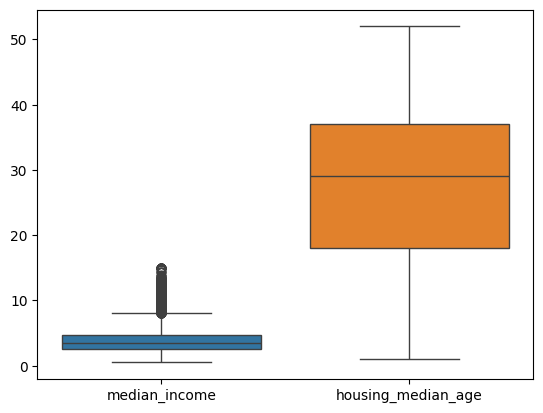

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['median_income', 'housing_median_age']])
plt.show()


In [ ]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


In [ ]:
df.to_csv("/content/cleaned_housing_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("/content/cleaned_housing_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>